In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
import pickle

In [13]:
# Metrics
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, auc, roc_curve

In [12]:
# Validation
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.pipeline import Pipeline, make_pipeline

In [15]:
# Tuning
from sklearn.model_selection import GridSearchCV

In [16]:
# Feature Extraction
from sklearn.feature_selection import RFE

In [17]:
# Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, Binarizer, LabelEncoder

In [18]:
# Models
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [19]:
# Ensembles
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
warnings.filterwarnings('ignore')


sns.set_style("whitegrid", {'axes.grid' : False})
pio.templates.default = "plotly_white"


In [6]:
def explore_data(df):
    print("Number of Instances and Attributes:", df.shape)
    print('\n')
    print('Dataset columns:',df.columns)
    print('\n')
    print('Data types of each columns: ', df.info())

In [5]:
def checking_removing_duplicates(df):
    count_dups = df.duplicated().sum()
    print("Number of Duplicates: ", count_dups)
    if count_dups >= 1:
        df.drop_duplicates(inplace=True)
        print('Duplicate values removed!')
    else:
        print('No Duplicate values')

In [4]:
def read_in_and_split_data(data, target):
    X = data.drop(target, axis=1)
    y = data[target]
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)
    return X_train, X_test, y_train, y_test

In [7]:
def GetModel():
    Models = []
    Models.append(('LR'   , LogisticRegression()))
    Models.append(('LDA'  , LinearDiscriminantAnalysis()))
    Models.append(('KNN'  , KNeighborsClassifier()))
    Models.append(('CART' , DecisionTreeClassifier()))
    Models.append(('NB'   , GaussianNB()))
    Models.append(('SVM'  , SVC(probability=True)))
    return Models

In [8]:
def ensemblemodels():
    ensembles = []
    ensembles.append(('AB'   , AdaBoostClassifier()))
    ensembles.append(('GBM'  , GradientBoostingClassifier()))
    ensembles.append(('RF'   , RandomForestClassifier()))
    ensembles.append(( 'Bagging' , BaggingClassifier()))
    ensembles.append(('ET', ExtraTreesClassifier()))
    return ensembles

In [9]:
def NormalizedModel(nameOfScaler):

    if nameOfScaler == 'standard':
        scaler = StandardScaler()
    elif nameOfScaler =='minmax':
        scaler = MinMaxScaler()
    elif nameOfScaler == 'normalizer':
        scaler = Normalizer()
    elif nameOfScaler == 'binarizer':
        scaler = Binarizer()

    pipelines = []
    pipelines.append((nameOfScaler+'LR'  , Pipeline([('Scaler', scaler),('LR'  , LogisticRegression())])))
    pipelines.append((nameOfScaler+'LDA' , Pipeline([('Scaler', scaler),('LDA' , LinearDiscriminantAnalysis())])))
    pipelines.append((nameOfScaler+'KNN' , Pipeline([('Scaler', scaler),('KNN' , KNeighborsClassifier())])))
    pipelines.append((nameOfScaler+'CART', Pipeline([('Scaler', scaler),('CART', DecisionTreeClassifier())])))
    pipelines.append((nameOfScaler+'NB'  , Pipeline([('Scaler', scaler),('NB'  , GaussianNB())])))
    pipelines.append((nameOfScaler+'SVM' , Pipeline([('Scaler', scaler),('SVM' , SVC())])))
    pipelines.append((nameOfScaler+'AB'  , Pipeline([('Scaler', scaler),('AB'  , AdaBoostClassifier())])  ))
    pipelines.append((nameOfScaler+'GBM' , Pipeline([('Scaler', scaler),('GMB' , GradientBoostingClassifier())])  ))
    pipelines.append((nameOfScaler+'RF'  , Pipeline([('Scaler', scaler),('RF'  , RandomForestClassifier())])  ))
    pipelines.append((nameOfScaler+'ET'  , Pipeline([('Scaler', scaler),('ET'  , ExtraTreesClassifier())])  ))

    return pipelines

In [10]:
def fit_model(X_train, y_train,models):
    # Test options and evaluation metric
    num_folds = 10
    scoring = 'accuracy'

    results = []
    names = []
    for name, model in models:
        kfold = KFold(n_splits=num_folds, shuffle=True, random_state=0)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

    return names, results

In [22]:
def save_model(model,filename):
    pickle.dump(model, open(filename, 'wb'))

In [49]:
def classification_metrics(model, conf_matrix):
    print(f"Training Accuracy Score: {model.score(X_train, y_train) * 100:.1f}%")
    print(f"Validation Accuracy Score: {model.score(X_test, y_test) * 100:.1f}%")
    fig,ax = plt.subplots(figsize=(8,6))
    sns.heatmap(pd.DataFrame(conf_matrix), annot = True, cmap = 'YlGnBu',fmt = 'g')
    ax.xaxis.set_label_position('top')
    plt.tight_layout()
    plt.title('Confusion Matrix', fontsize=20, y=1.1)
    plt.ylabel('Actual label', fontsize=15)
    plt.xlabel('Predicted label', fontsize=15)
    plt.show()
    print(classification_report(y_test, y_pred))

# Updated classification_metrics function to handle all parameters
# def classification_metrics(model, X_train, X_test, y_train, y_test):
#     """Calculate and display classification metrics."""
#     # Calculate predictions and confusion matrix
#     y_pred = model.predict(X_test)
#     conf_matrix = confusion_matrix(y_test, y_pred)

#     # Display training and validation accuracy
#     print(f"Training Accuracy Score: {model.score(X_train, y_train) * 100:.1f}%")
#     print(f"Validation Accuracy Score: {model.score(X_test, y_test) * 100:.1f}%")

#     # Plot the confusion matrix
#     fig, ax = plt.subplots(figsize=(8, 6))
#     sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap='YlGnBu', fmt='g')
#     ax.xaxis.set_label_position('top')
#     plt.tight_layout()
#     plt.title('Confusion Matrix', fontsize=20, y=1.1)
#     plt.ylabel('Actual label', fontsize=15)
#     plt.xlabel('Predicted label', fontsize=15)
#     plt.show()

#     # Display the classification report
#     print("Classification Report:\n", classification_report(y_test, y_pred))


In [ ]:
df = pd.read_csv('Crop_recommendation.csv')

In [ ]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
numeric_columns = df.select_dtypes(include=[np.number])
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3 - Q1
df_out = df[~((numeric_columns < (Q1 - 1.5 * IQR)) | (numeric_columns > (Q3 + 1.5 * IQR))).any(axis=1)]

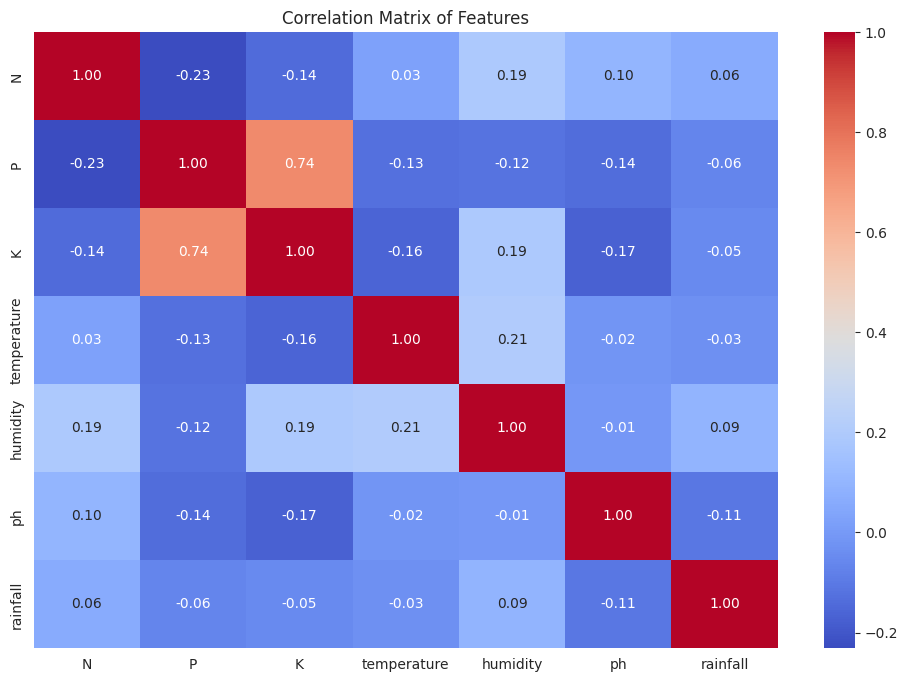

In [ ]:
def plot_correlation_matrix(df):
    plt.figure(figsize=(12, 8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix of Features')
    plt.show()

plot_correlation_matrix(numeric_columns)

In [ ]:
df_out

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
13,93,56,36,24.014976,82.056872,6.984354,185.277339,rice
14,94,50,37,25.665852,80.663850,6.948020,209.586971,rice
17,91,35,39,23.793920,80.418180,6.970860,206.261186,rice
20,89,45,36,21.325042,80.474764,6.442475,185.497473,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [40]:
target ='label'
X_train, X_test, y_train, y_test = read_in_and_split_data(df, target)


In [41]:
pipeline = make_pipeline(StandardScaler(),  GaussianNB())

In [42]:
model = pipeline.fit(X_train, y_train)

In [43]:
y_pred = model.predict(X_test)

In [47]:
conf_matrix = confusion_matrix(y_test,y_pred)

Training Accuracy Score: 99.5%
Validation Accuracy Score: 99.3%


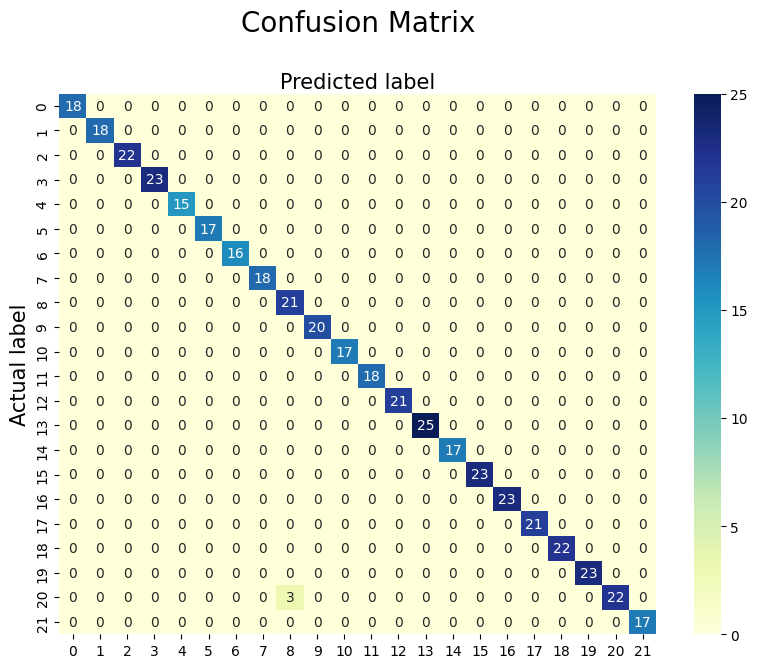

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       1.00      1.00      1.00        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        16
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        17
       maize       1.00      1.00      1.00        18
       mango       1.00      1.00      1.00        21
   mothbeans       1.00      1.00      1.00        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

In [50]:
classification_metrics(pipeline, conf_matrix)

In [ ]:
# save model
save_model(model, 'model.pkl')

In [24]:
# Load and preprocess the dataset as before
# df = pd.read_csv('Crop_recommendation.csv')
# target = 'label'
X_train, X_test, y_train, y_test = read_in_and_split_data(df, target)

In [25]:
 # Step 1: Train and Evaluate Basic Models
print("Training and Evaluating Basic Models:\n")
models = GetModel()
names, results = fit_model(X_train, y_train, models)

Training and Evaluating Basic Models:



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LR: 0.955114 (0.016749)
LDA: 0.965909 (0.013203)
KNN: 0.979545 (0.005207)
CART: 0.984659 (0.011658)
NB: 0.993750 (0.004720)
SVM: 0.976705 (0.008214)


In [26]:
# Step 2: Train and Evaluate Ensemble Models
print("\nTraining and Evaluating Ensemble Models:\n")
ensemble_models = ensemblemodels()
ensemble_names, ensemble_results = fit_model(X_train, y_train, ensemble_models)


Training and Evaluating Ensemble Models:



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

AB: 0.146023 (0.038034)
GBM: 0.988068 (0.006453)
RF: 0.994318 (0.003593)
Bagging: 0.990909 (0.005207)
ET: 0.991477 (0.005238)


In [27]:
# Step 3: Final Model Training using an Ensemble Method (e.g., RandomForest)
print("\nTraining Final Model with RandomForest:\n")
pipeline = make_pipeline(StandardScaler(), RandomForestClassifier())
final_model = pipeline.fit(X_train, y_train)


Training Final Model with RandomForest:



In [51]:
#Updated classification_metrics function to handle all parameters
def classification_metrics(model, X_train, X_test, y_train, y_test):
    """Calculate and display classification metrics."""
    # Calculate predictions and confusion matrix
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Display training and validation accuracy
    print(f"Training Accuracy Score: {model.score(X_train, y_train) * 100:.1f}%")
    print(f"Validation Accuracy Score: {model.score(X_test, y_test) * 100:.1f}%")

    # Plot the confusion matrix
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap='YlGnBu', fmt='g')
    ax.xaxis.set_label_position('top')
    plt.tight_layout()
    plt.title('Confusion Matrix', fontsize=20, y=1.1)
    plt.ylabel('Actual label', fontsize=15)
    plt.xlabel('Predicted label', fontsize=15)
    plt.show()

#     # Display the classification report
#     print("Classification Report:\n", classification_report(y_test, y_pred))


Evaluating Final Model Performance:

Training Accuracy Score: 100.0%
Validation Accuracy Score: 99.8%


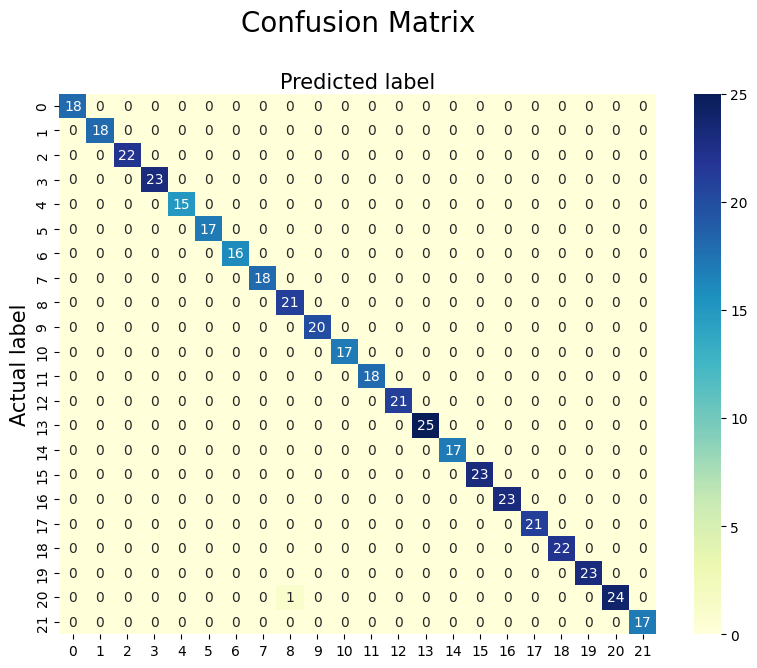

In [52]:
# Step 4: Evaluate Final Model Performance
print("Evaluating Final Model Performance:\n")
classification_metrics(final_model, X_train, X_test, y_train, y_test)


In [53]:
 # Step 5: Save the Final Model
save_model(final_model, 'final_ensemble_crop_model.pkl')